The Nanite mine is an explosive ordnance capable of creating further iterations of itself from affected targets. According to the proposed designs, a single nanite can create enough nanites to make a mine in six hours, while a thousand can create it in one hour. This base-line will be used to determine the nanite growth thresholds.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
%matplotlib inline

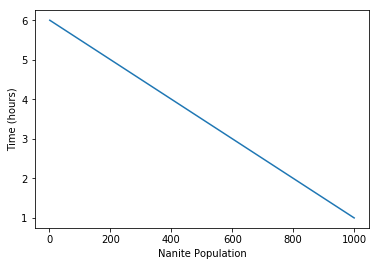

Time to create a mine is: time = -0.005005005005005005 * x + 6.005005005005005


In [7]:
# Populations
aPop = 1 #Lowest population
bPop = 1000 #Highest population
aTime = 6 #Time associated with the lowest population
bTime = 1 #Time associated with the highest population

#Intervals
deltax = bPop-aPop #Determines x component of slope
deltay = bTime-aTime #Determins y component of slope
m = deltay/deltax
b = aTime - (deltay/deltax)*aPop

#Lists
population = []
time = []

#Scaling factors
N = 500 #Number of desired steps
h = (bPop-aPop)/N #Sets sub-interval widths

#Main calculations
population.append(aPop)
time.append(aTime)
for i in range(N):
    population.append(aPop+h*(i+1))
    time.append(m*population[i+1] + b)
    
plt.plot(population,time)
plt.xlabel("Nanite Population")
plt.ylabel("Time (hours)")
plt.show()

print("Time to create a mine is: time =",m,"* x +",b)

Assuming non-linear calculations (namely exponential), it can instead be modelled as such:
$$Time(hr) = 6.01 * 0.999^{Starting Population}$$
Assuming that a single mine contains a thousand nanites, this means that each mine can create a new mine in one hour. By extension, this means that a thousand nanites can produce a thousand nanites in one hour. This can be written as:
$$N(t) = InitPop * 2^{\frac{t}{\lambda}}$$

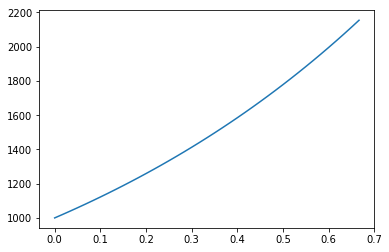

In [3]:
# Constant Definition
nanitesPerMine = 1000 #Determines how many nanites are in a mine; capable of being adjusted
initialNanites = 1000 #Determines original number of nanites
t1 = 0 #Sets initial time
time = []
population = []
mines = []
halflife = 6
N = 40
h = 1/60 #One hour time step

time.append(t1)
population.append(initialNanites)
mines.append(population[0]/nanitesPerMine)
for i in range(N):
    time.append((i+1)*h+t1)
    population.append(initialNanites*nanitesPerMine**(time[i+1]/halflife))
    mines.append(math.floor(population[i+1]/nanitesPerMine))
    
    
plt.plot(time,population)
plt.show()

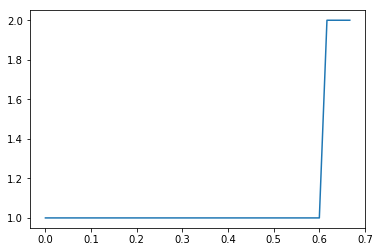

In [4]:
plt.plot(time,mines)
plt.show()